Centroides:
 [[-0.15577223  0.80277132]
 [ 0.862616   -0.54849341]
 [-0.96585517 -0.50102081]]


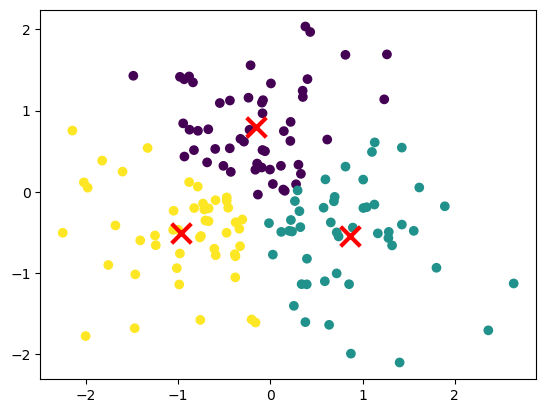

In [17]:
'''Ejercicio 3.21.1
Utilizando make_gaussian_quantiles de sklearn datasets, para crear un conjunto de datos, 
aplica el algoritmo de clustering K-Means indicando cuáles son los centroides 
y pintándolos en un gráfico de dispersión si n_samples=150 para 3 clústeres.'''


import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_gaussian_quantiles

# Creamos el conjunto de datos con n_samples=150 para 3 clústeres
X, y_clusters = make_gaussian_quantiles(n_samples=150, n_classes=3)

# Inicializamos el algoritmo K-Means con k = 3 clústeres
kmeans = KMeans(n_clusters=3)

#Entrenamos el modelo con los datos
kmeans.fit(X)
#Predecimos la asignación del clúster para cada punto de datos
labels = kmeans.predict(X)
#Obtenemos los centroides de los clústeres
centroides = kmeans.cluster_centers_
print("Centroides:\n", centroides)
#Visualizamos los datos y los centroides de los clústeres en un gráfico de dispersión 
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroides[:, 0], centroides[:, 1], marker="x", s=200, linewidths=3, color="r") 
plt.show()

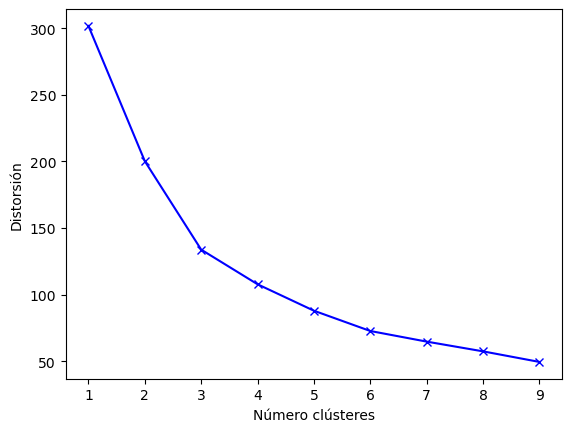

In [28]:
'''Ejercicio 3.21.2
Crear 3 clústeres en el ejercicio anterior, ¿era la mejor opción?
Justifica tu respuesta basándote en la aplicación del método de dispersión y comparte el código utilizado para hacerlo en este foro.'''
#Calculamos la distorsión existente para un rango de 1 a 10 clústeres. n_init es el número de veces que se lanza el algoritmo con diferentes datos iniciales para los centroides
X, y_clusters = make_gaussian_quantiles(n_samples=150, n_classes=3)
distorsion = []
for i in range(1,10):
    kmeans = KMeans (n_clusters = i, n_init=10).fit(X)
    distorsion.append(kmeans.inertia_)
#Pintamos la gráfica
plt.xlabel("Número clústeres") 
plt.ylabel("Distorsión")
plt.plot(range(1,10), distorsion, "bx-") 
plt.show()


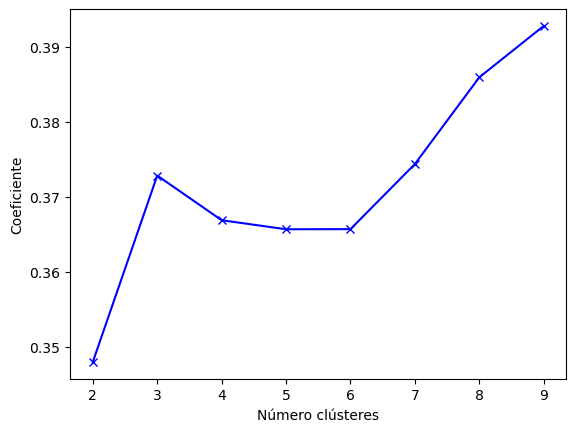

In [29]:
'''Ejercicio 3.21.3
Y si utilizas el método de Shilhouette, ¿cuál habría sido el número de clústeres óptimo para los datos del ejercicio 3.21.1?'''

#Importamos las librerías necesarias que no habíamos importado anteriormente
X, y_clusters = make_gaussian_quantiles(n_samples=150, n_classes=3)
from sklearn.metrics import silhouette_score
#Calculamos los coeficientes
coef_avgs = []
for i in range (2,10):
    kmeans = KMeans (n_clusters = i, n_init = 10).fit(X)
    coef_avgs.append(silhouette_score(X, kmeans.labels_))
#Pintamos la gráfica
plt.xlabel("Número clústeres") 
plt.ylabel("Coeficiente") 
plt.plot(range(2,10), coef_avgs, "bx-") 
plt.show()

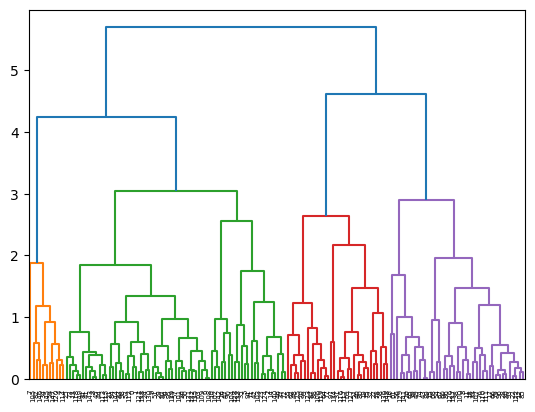

In [30]:
'''Ejercicio 3.21.4
Sobre los mismos datos, y utilizando la agrupación jerárquica,
pinta un dendrograma calculando la matriz de enlace con el método completo y la distancia euclidiana. ¿Cuántos clústeres se generan?'''

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

X, y_clusters = make_gaussian_quantiles(n_samples=150, n_classes=3)

Z = linkage(X, method="complete", metric="euclidean")
#Pintamos el dendrograma resultante
dendrogram(Z)
plt.show()

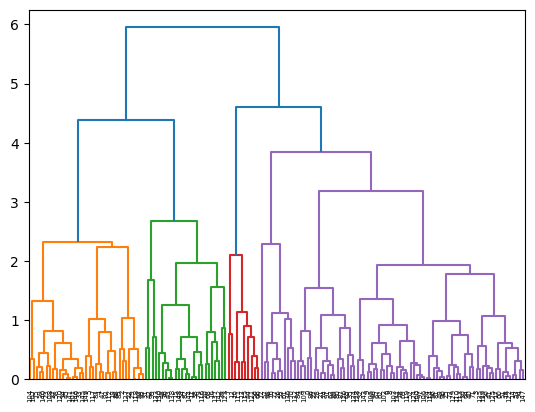

Número de clusters: 4


In [32]:
# Creamos una matriz de datos (X) previamente

Z = linkage(X, method="complete", metric="euclidean")

dendrogram(Z)
plt.show()

# Establecemos el umbral para determinar el número de clusters automáticamente
threshold = 0.7 * max(Z[:, 2])  # Se utiliza el 70% de la distancia máxima

# Obtenemos las etiquetas de clúster para cada punto de datos utilizando el umbral
labels = fcluster(Z, threshold, criterion='distance')

# Obtenemos el número de clusters
num_clusters = len(set(labels))
print("Número de clusters:", num_clusters)

<function matplotlib.pyplot.show(close=None, block=None)>

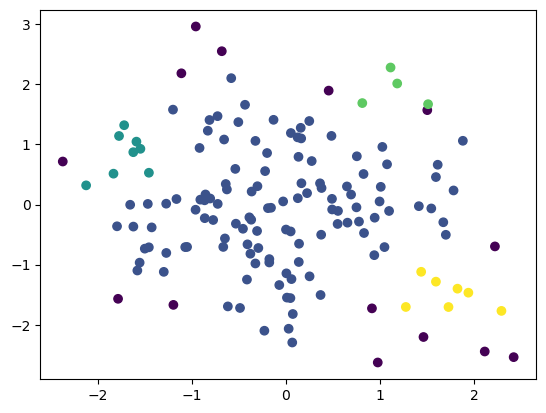

In [50]:
'''Ejercicio 3.21.5
Si utilizas el algoritmo DBSCAN, ¿cuántos clústeres se crearan para n_samples=150 y el número mínimo de puntos igual a 4?'''

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
#Creamos un conjunto de datos de prueba 
X, y_clusters = make_gaussian_quantiles(n_samples=150)
dbscan = DBSCAN (min_samples=4)
#Ajustamos y entramos el modelo en los datos
y_pred = dbscan.fit_predict(X)
#Pintamos los resultados
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show

